Подключаем библиотеки и загружаем и подготавливаем датасеты

In [357]:
import py7zr
import pandas as pd
import pandas as pd
from datetime import date, timedelta
import win32com.client as win32
import schedule
import time
import teradatasql
import datetime
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
import matplotlib.pyplot as plt

In [358]:
user="****"
password="****"
query = '''select * from ***vf_ad_hoc_tehnology_2'''

In [359]:
with teradatasql.connect(host="td2800.corp.tele2.ru", user=user, password=password,logmech="ldap", tmode="TERA" ) as connect:
    df = pd.read_sql(query, connect)
df

c:\Users\vitaly.flerin\Miniconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,create_date,Region,subs_id,point_name,data_gb,nps,ltr,mb_last_30,tr_2g,tr_3g,tr_4g
0,2022-06-02,Екатеринбург,3.000007e+11,Мобильный интернет,30.782479,1,10,31521.258522,255.733555,4453.960665,26811.564302
1,2022-01-19,Тюмень,1.000710e+11,Мобильный интернет,25.365706,1,10,25974.483306,155.754683,276.776809,25541.951814
2,2022-12-01,Новосибирск,1.000608e+11,Мобильный интернет,115.899388,-1,1,118680.973407,0.521869,425.655977,118254.795561
3,2022-04-04,Волгоград,6.208242e+07,Мобильный интернет,10.399204,1,10,10648.784989,428.167114,3312.623648,6907.994227
4,2022-01-31,Калуга,2.000733e+11,Мобильный интернет,2.043939,-1,3,2092.993863,22.639756,257.215265,1813.138842
...,...,...,...,...,...,...,...,...,...,...,...
390226,2022-11-29,Ульяновск,2.000520e+11,Мобильный интернет,15.434472,-1,1,15804.899652,97.129984,882.258834,14825.510835
390227,2022-10-11,В.Новгород,2.000858e+11,Мобильный интернет,85.587219,-1,4,87641.312024,32.106957,2476.600850,85132.604217
390228,2022-05-19,Кемерово,1.000438e+11,Мобильный интернет,2.376968,1,10,2434.014976,33.736350,282.557761,2117.720864
390229,2022-08-01,Челябинск,1.000227e+11,Мобильный интернет,61.871165,0,7,63356.072648,45.430758,2553.744772,60756.897118


In [361]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390231 entries, 0 to 390230
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   create_date  390231 non-null  object 
 1   Region       390231 non-null  object 
 2   subs_id      390231 non-null  float64
 3   point_name   390231 non-null  object 
 4   data_gb      390231 non-null  float64
 5   nps          390231 non-null  int64  
 6   ltr          390231 non-null  int64  
 7   mb_last_30   390231 non-null  float64
 8   tr_2g        336840 non-null  float64
 9   tr_3g        383059 non-null  float64
 10  tr_4g        382322 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 32.7+ MB
None
create_date        0
Region             0
subs_id            0
point_name         0
data_gb            0
nps                0
ltr                0
mb_last_30         0
tr_2g          53391
tr_3g           7172
tr_4g           7909
dtype: int64


In [362]:
df.describe()

,subs_id,data_gb,nps,ltr,mb_last_30,tr_2g,tr_3g,tr_4g
count,3.902310e+05,390231.000000,390231.000000,390231.000000,3.902310e+05,336840.000000,383059.000000,382322.000000
mean,1.364259e+11,29.539055,0.250316,7.529689,3.024799e+04,127.070195,2575.456335,28181.350128
std,1.083373e+11,33.254459,0.889261,3.130879,3.405257e+04,375.289007,7642.240616,32746.442338
min,1.583650e+05,0.100588,-1.000000,1.000000,1.030023e+02,0.000000,0.000038,0.000198
25%,6.426043e+07,7.930930,-1.000000,5.000000,8.121273e+03,3.538469,315.618784,7140.222445
50%,1.000704e+11,19.150733,1.000000,9.000000,1.961035e+04,26.651661,847.223447,17809.665012
75%,2.000852e+11,39.404967,1.000000,10.000000,4.035069e+04,102.258252,2125.944553,37516.559872
max,3.000652e+11,977.902399,1.000000,10.000000,1.001372e+06,23761.966162,573669.224190,999296.155329


In [363]:
#удаляем пропущенные 
#df['col1'] = df['col1']. fillna(df['col1'].mean()) - замена пропусков
df_1 = df.dropna (subset=['data_gb'])
df_1

,create_date,Region,subs_id,point_name,data_gb,nps,ltr,mb_last_30,tr_2g,tr_3g,tr_4g
0,2022-06-02,Екатеринбург,3.000007e+11,Мобильный интернет,30.782479,1,10,31521.258522,255.733555,4453.960665,26811.564302
1,2022-01-19,Тюмень,1.000710e+11,Мобильный интернет,25.365706,1,10,25974.483306,155.754683,276.776809,25541.951814
2,2022-12-01,Новосибирск,1.000608e+11,Мобильный интернет,115.899388,-1,1,118680.973407,0.521869,425.655977,118254.795561
3,2022-04-04,Волгоград,6.208242e+07,Мобильный интернет,10.399204,1,10,10648.784989,428.167114,3312.623648,6907.994227
4,2022-01-31,Калуга,2.000733e+11,Мобильный интернет,2.043939,-1,3,2092.993863,22.639756,257.215265,1813.138842
...,...,...,...,...,...,...,...,...,...,...,...
390226,2022-11-29,Ульяновск,2.000520e+11,Мобильный интернет,15.434472,-1,1,15804.899652,97.129984,882.258834,14825.510835
390227,2022-10-11,В.Новгород,2.000858e+11,Мобильный интернет,85.587219,-1,4,87641.312024,32.106957,2476.600850,85132.604217
390228,2022-05-19,Кемерово,1.000438e+11,Мобильный интернет,2.376968,1,10,2434.014976,33.736350,282.557761,2117.720864
390229,2022-08-01,Челябинск,1.000227e+11,Мобильный интернет,61.871165,0,7,63356.072648,45.430758,2553.744772,60756.897118


In [364]:
#Поиск дубликатов по сабсам(забиваем)
df_1[df_1.duplicated ('subs_id')].sort_values(by='subs_id')

,create_date,Region,subs_id,point_name,data_gb,nps,ltr,mb_last_30,tr_2g,tr_3g,tr_4g
125593,2022-10-18,Ростов на Дону,1.764120e+05,Мобильный интернет,8.855200,1,10,9067.724757,4.340540,385.314526,8678.069692
154147,2022-10-10,Ростов на Дону,1.765480e+05,Мобильный интернет,21.702791,1,10,22223.657846,0.026420,126.961503,22096.669924
363543,2022-11-18,С.Петербург,1.983740e+05,Мобильный интернет,6.257168,1,10,6407.339914,3.509487,83.899491,6319.930936
237118,2022-10-06,С.Петербург,1.998580e+05,Мобильный интернет,22.554569,0,8,23095.878734,2.331995,500.994532,22592.552207
283792,2022-05-25,С.Петербург,2.003650e+05,Мобильный интернет,28.947922,1,9,29642.671873,57.853212,269.784462,29315.034199
...,...,...,...,...,...,...,...,...,...,...,...
371426,2022-11-04,Курган,3.000616e+11,Мобильный интернет,23.969126,1,10,24544.385403,89.133658,1533.371616,22921.880128
385744,2022-09-07,Москва,3.000619e+11,Мобильный интернет,6.792684,1,10,6955.708597,NaN,1541.328550,5414.380047
45872,2022-09-06,Пермь,3.000621e+11,Мобильный интернет,159.034523,-1,6,162851.352040,0.045609,426.613972,162424.692459
189455,2022-09-23,Екатеринбург,3.000625e+11,Мобильный интернет,11.927958,1,10,12214.228510,2.624799,402.925433,11808.678278


In [365]:
df_1['share_4g'] = round(df_1['tr_4g'] / df_1['mb_last_30'], 2)	
df_1['share_3g'] = round(df_1['tr_3g'] / df_1['mb_last_30'], 2)
df_1['share_2g'] = round(df_1['tr_2g'] / df_1['mb_last_30'], 2)	
df_1

,create_date,Region,subs_id,point_name,data_gb,nps,ltr,mb_last_30,tr_2g,tr_3g,tr_4g,share_4g,share_3g,share_2g
0,2022-06-02,Екатеринбург,3.000007e+11,Мобильный интернет,30.782479,1,10,31521.258522,255.733555,4453.960665,26811.564302,0.85,0.14,0.01
1,2022-01-19,Тюмень,1.000710e+11,Мобильный интернет,25.365706,1,10,25974.483306,155.754683,276.776809,25541.951814,0.98,0.01,0.01
2,2022-12-01,Новосибирск,1.000608e+11,Мобильный интернет,115.899388,-1,1,118680.973407,0.521869,425.655977,118254.795561,1.00,0.00,0.00
3,2022-04-04,Волгоград,6.208242e+07,Мобильный интернет,10.399204,1,10,10648.784989,428.167114,3312.623648,6907.994227,0.65,0.31,0.04
4,2022-01-31,Калуга,2.000733e+11,Мобильный интернет,2.043939,-1,3,2092.993863,22.639756,257.215265,1813.138842,0.87,0.12,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390226,2022-11-29,Ульяновск,2.000520e+11,Мобильный интернет,15.434472,-1,1,15804.899652,97.129984,882.258834,14825.510835,0.94,0.06,0.01
390227,2022-10-11,В.Новгород,2.000858e+11,Мобильный интернет,85.587219,-1,4,87641.312024,32.106957,2476.600850,85132.604217,0.97,0.03,0.00
390228,2022-05-19,Кемерово,1.000438e+11,Мобильный интернет,2.376968,1,10,2434.014976,33.736350,282.557761,2117.720864,0.87,0.12,0.01
390229,2022-08-01,Челябинск,1.000227e+11,Мобильный интернет,61.871165,0,7,63356.072648,45.430758,2553.744772,60756.897118,0.96,0.04,0.00


In [366]:
#поиск пропусков 
print(df_1.isnull().sum())

create_date        0
Region             0
subs_id            0
point_name         0
data_gb            0
nps                0
ltr                0
mb_last_30         0
tr_2g          53391
tr_3g           7172
tr_4g           7909
share_4g        7909
share_3g        7172
share_2g       53391
dtype: int64


In [367]:
df_1[['share_4g',	'share_3g',	'share_2g', 'tr_2g',	'tr_3g',	'tr_4g']] = df_1[['share_4g',	'share_3g',	'share_2g', 'tr_2g', 'tr_3g', 'tr_4g']].fillna(0)


In [368]:
corr = df_1.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,subs_id,data_gb,nps,ltr,mb_last_30,tr_2g,tr_3g,tr_4g,share_4g,share_3g,share_2g
subs_id,1.000000,0.010000,-0.020000,-0.010000,0.010000,-0.030000,0.030000,0.010000,-0.030000,0.040000,-0.020000
data_gb,0.010000,1.000000,-0.090000,-0.090000,1.000000,0.090000,0.290000,0.970000,0.110000,-0.100000,-0.100000
nps,-0.020000,-0.090000,1.000000,0.930000,-0.090000,-0.100000,-0.080000,-0.070000,0.080000,-0.070000,-0.060000
ltr,-0.010000,-0.090000,0.930000,1.000000,-0.090000,-0.100000,-0.080000,-0.070000,0.090000,-0.080000,-0.070000
mb_last_30,0.010000,1.000000,-0.090000,-0.090000,1.000000,0.090000,0.290000,0.970000,0.110000,-0.100000,-0.100000
tr_2g,-0.030000,0.090000,-0.100000,-0.100000,0.090000,1.000000,0.210000,0.040000,-0.270000,0.180000,0.440000
tr_3g,0.030000,0.290000,-0.080000,-0.080000,0.290000,0.210000,1.000000,0.070000,-0.540000,0.570000,0.010000
tr_4g,0.010000,0.970000,-0.070000,-0.070000,0.970000,0.040000,0.070000,1.000000,0.250000,-0.230000,-0.110000
share_4g,-0.030000,0.110000,0.080000,0.090000,0.110000,-0.270000,-0.540000,0.250000,1.000000,-0.980000,-0.330000
share_3g,0.040000,-0.100000,-0.070000,-0.080000,-0.100000,0.180000,0.570000,-0.230000,-0.980000,1.000000,0.110000


In [369]:
df_1

,create_date,Region,subs_id,point_name,data_gb,nps,ltr,mb_last_30,tr_2g,tr_3g,tr_4g,share_4g,share_3g,share_2g
0,2022-06-02,Екатеринбург,3.000007e+11,Мобильный интернет,30.782479,1,10,31521.258522,255.733555,4453.960665,26811.564302,0.85,0.14,0.01
1,2022-01-19,Тюмень,1.000710e+11,Мобильный интернет,25.365706,1,10,25974.483306,155.754683,276.776809,25541.951814,0.98,0.01,0.01
2,2022-12-01,Новосибирск,1.000608e+11,Мобильный интернет,115.899388,-1,1,118680.973407,0.521869,425.655977,118254.795561,1.00,0.00,0.00
3,2022-04-04,Волгоград,6.208242e+07,Мобильный интернет,10.399204,1,10,10648.784989,428.167114,3312.623648,6907.994227,0.65,0.31,0.04
4,2022-01-31,Калуга,2.000733e+11,Мобильный интернет,2.043939,-1,3,2092.993863,22.639756,257.215265,1813.138842,0.87,0.12,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390226,2022-11-29,Ульяновск,2.000520e+11,Мобильный интернет,15.434472,-1,1,15804.899652,97.129984,882.258834,14825.510835,0.94,0.06,0.01
390227,2022-10-11,В.Новгород,2.000858e+11,Мобильный интернет,85.587219,-1,4,87641.312024,32.106957,2476.600850,85132.604217,0.97,0.03,0.00
390228,2022-05-19,Кемерово,1.000438e+11,Мобильный интернет,2.376968,1,10,2434.014976,33.736350,282.557761,2117.720864,0.87,0.12,0.01
390229,2022-08-01,Челябинск,1.000227e+11,Мобильный интернет,61.871165,0,7,63356.072648,45.430758,2553.744772,60756.897118,0.96,0.04,0.00


In [370]:
#добавляем функцию и делим дополнительный столбец с цветом НПС, во фрейм
def regioncolors(beans):
    if beans ['share_4g'] >= 0.9:
        return '90-100%'
    elif beans ['share_4g'] >= 0.8 < 0.9 :
        return'80-90%'
    elif beans ['share_4g'] >= 0.7 < 0.8 :
        return'70-80%'
    elif beans ['share_4g'] >= 0.6 < 0.7 :
        return'60-70%'
    elif beans ['share_4g'] >= 0.5 < 0.6 :
        return'50-60%'
    elif beans ['share_4g'] >= 0.4 < 0.5 :
        return'40-50%'
    elif beans ['share_4g'] >= 0.3 < 0.4 :
        return'30-40%'
    elif beans ['share_4g'] >= 0.2 < 0.3 :
        return'20-30%'
    elif beans ['share_4g'] >= 0.1 < 0.2 :
        return'10-20%'
    elif beans ['share_4g'] >= 0.001 < 0.1 :
        return'1-10%'
    elif beans ['share_4g'] ==0:
        return'0%'    
    else:
        return('other')

In [375]:
df_1["beans"] = df_1.apply(regioncolors, axis=1)
df_1["beans"].value_counts()

90-100%    287210
80-90%      54412
70-80%      18528
60-70%       8500
0%           8387
50-60%       4708
40-50%       2862
30-40%       1927
20-30%       1422
1-10%        1184
10-20%       1091
Name: beans, dtype: int64

In [376]:
df_2 = df_1.groupby(['beans']).agg({'nps': ['mean', 'count']}). reset_index()
df_2

beans       nps        
                 mean   count
0        0%  0.224395    8387
1     1-10%  0.005068    1184
2    10-20%  0.047663    1091
3    20-30%  0.029536    1422
4    30-40% -0.022833    1927
5    40-50% -0.018868    2862
6    50-60% -0.012319    4708
7    60-70% -0.019647    8500
8    70-80%  0.025475   18528
9    80-90%  0.095549   54412
10  90-100%  0.314582  287210

In [377]:
df_2.columns = ['_'.join(col).strip() for col in df_2.columns.values]
df_2

,beans_,nps_mean,nps_count
0,0%,0.224395,8387
1,1-10%,0.005068,1184
2,10-20%,0.047663,1091
3,20-30%,0.029536,1422
4,30-40%,-0.022833,1927
5,40-50%,-0.018868,2862
6,50-60%,-0.012319,4708
7,60-70%,-0.019647,8500
8,70-80%,0.025475,18528
9,80-90%,0.095549,54412


In [378]:
df_2['share'] = round(df_2['nps_count'] / df_2.nps_count.sum(), 2)
df_2

,beans_,nps_mean,nps_count,share
0,0%,0.224395,8387,0.02
1,1-10%,0.005068,1184,0.00
2,10-20%,0.047663,1091,0.00
3,20-30%,0.029536,1422,0.00
4,30-40%,-0.022833,1927,0.00
5,40-50%,-0.018868,2862,0.01
6,50-60%,-0.012319,4708,0.01
7,60-70%,-0.019647,8500,0.02
8,70-80%,0.025475,18528,0.05
9,80-90%,0.095549,54412,0.14


In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=df_2, x="beans_", y="nps_mean", ax=ax).set (title='NPS в разрезе бинов(трафика 4G)') 
plt.show()

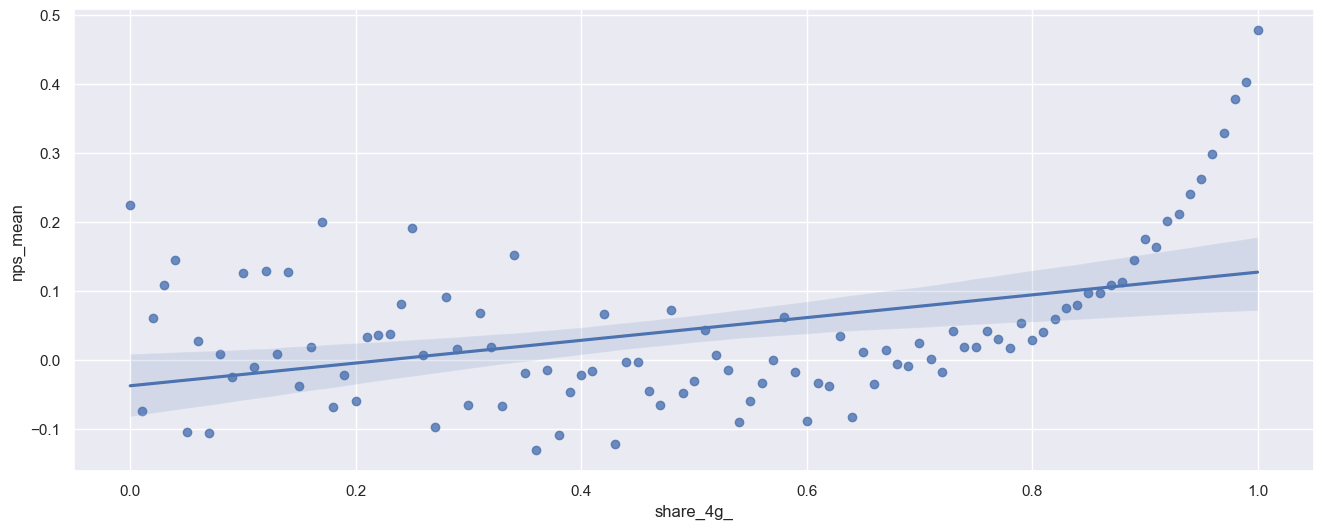

In [381]:
df_3 = df_1.groupby(['share_4g']).agg({'nps': ['mean', 'count']}). reset_index()
df_3.columns = ['_'.join(col).strip() for col in df_3.columns.values]
fig, ax = plt.subplots(figsize=(16, 6))
sns.regplot(data=df_3, x="share_4g_", y="nps_mean")
plt.show()

In [ ]:
df_3.head(30)

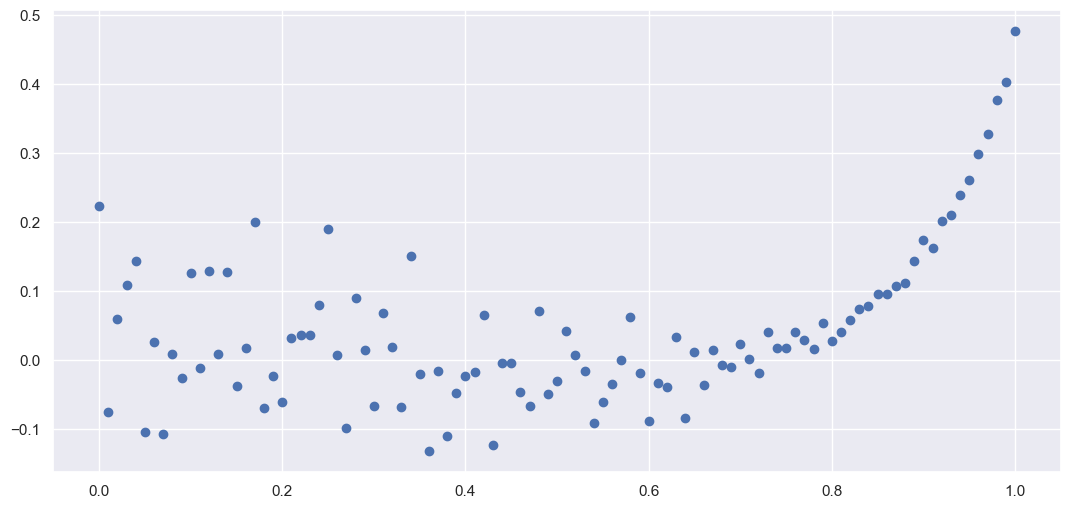

In [383]:
fig, ax = plt.subplots(figsize=(13, 6))
plt.scatter(df_3.share_4g_, df_3.nps_mean)
plt.show()

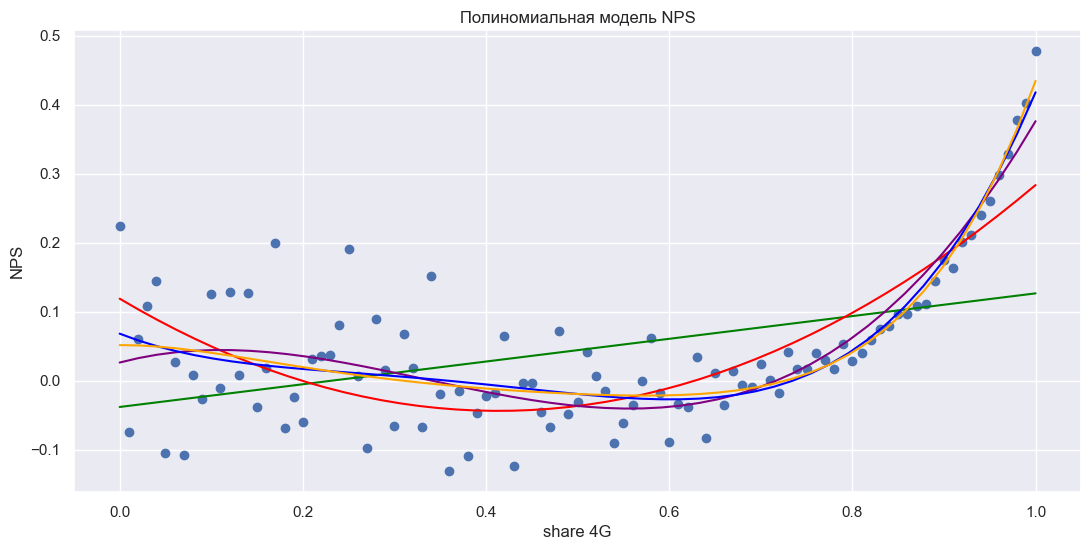

In [384]:
import numpy as np

#fit polynomial models up to degree 5
model1 = np.poly1d (np.polyfit (df_3.share_4g_, df_3.nps_mean , 1))
model2 = np.poly1d (np.polyfit (df_3.share_4g_, df_3.nps_mean , 2))
model3 = np.poly1d (np.polyfit (df_3.share_4g_, df_3.nps_mean , 3))
model4 = np.poly1d (np.polyfit (df_3.share_4g_, df_3.nps_mean , 4))
model5 = np.poly1d (np.polyfit (df_3.share_4g_, df_3.nps_mean , 5))
fig, ax = plt.subplots(figsize=(13, 6))
#create scatterplot
polyline = np.linspace (0, 1, 50)
plt.scatter (df_3.share_4g_, df_3.nps_mean)

#add fitted polynomial lines to scatterplot 
plt.plot (polyline, model1(polyline), color='green')
plt.plot (polyline, model2(polyline), color='red')
plt.plot (polyline, model3(polyline), color='purple')
plt.plot (polyline, model4(polyline), color='blue')
plt.plot (polyline, model5(polyline), color='orange')
plt.xlabel("share 4G")
plt.ylabel("NPS")
plt.title("Полиномиальная модель NPS")
plt.show()


In [385]:
#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))

    return results

#calculated adjusted R-squared of each model
adjR(df_3.share_4g_, df_3.nps_mean, 1)
adjR(df_3.share_4g_, df_3.nps_mean, 2)
adjR(df_3.share_4g_, df_3.nps_mean, 3)
adjR(df_3.share_4g_, df_3.nps_mean, 4)
adjR(df_3.share_4g_, df_3.nps_mean, 5)

#{'r_squared': 0.3144819}
#{'r_squared': 0.5186706}
#{'r_squared': 0.7842864}
#{'r_squared': 0.9590276}
#{'r_squared': 0.9549709}


#R-квадрат — мера того, насколько хорошо модель линейной регрессии «соответствует» набору данных. R-квадрат представляет собой долю дисперсии в переменной отклика, которая может быть объяснена предикторной переменной

#Если цель для регрессионной модели состоит в том, чтобы объяснить взаимосвязь между предиктором (предикторами) и переменной отклика, R-квадрат не имеет значения
#Если цель состоит в том, чтобы точно предсказать значение переменной отклика с помощью переменной-предиктора, то R-квадрат важен

{'r_squared': 0.6909357590391245}

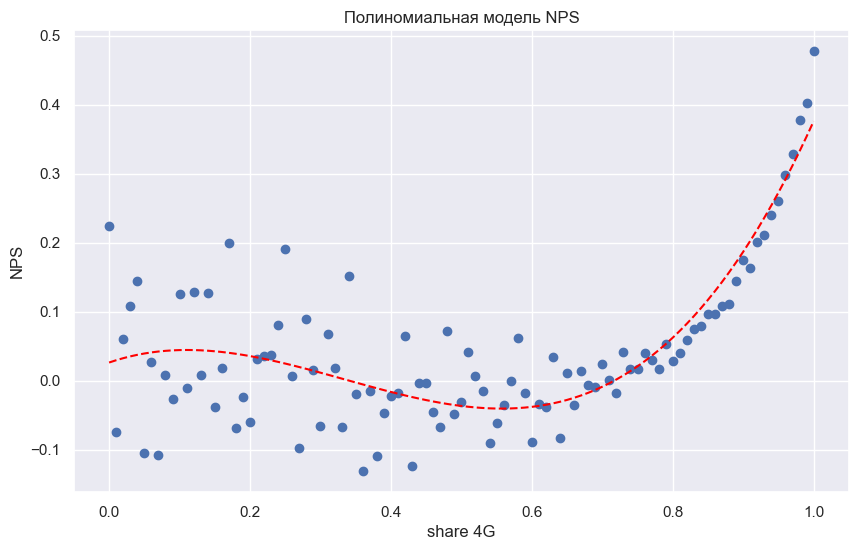

In [386]:
#fit fourth-degree polynomial
model4 = np.poly1d (np.polyfit (df_3.share_4g_, df_3.nps_mean , 3))
fig, ax = plt.subplots(figsize=(10, 6))
#define scatterplot
polyline = np.linspace (0, 1, 101)
plt.scatter (df_3.share_4g_, df_3.nps_mean )

#add fitted polynomial curve to scatterplot
plt.plot (polyline, model4(polyline), '--', color='red')
plt.xlabel("share 4G")
plt.ylabel("NPS")
plt.title("Полиномиальная модель NPS")

plt.show()

In [387]:
print(model4)

       3         2
1.908 x - 1.911 x + 0.3524 x + 0.0265


y = 1.908 * x^3 - 1.911 * x^2 + 0.3524 * х + 0.0265

Phik (𝜙k)
Новый коэффициент "корреляции"

In [388]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

Зависимость NPS от доли трафика 4G  - 70%

In [389]:
df_3.phik_matrix()

interval columns not set, guessing: ['share_4g_', 'nps_mean', 'nps_count']


,share_4g_,nps_mean,nps_count
share_4g_,1.000000,0.709117,0.669601
nps_mean,0.709117,1.000000,0.956449
nps_count,0.669601,0.956449,1.000000


In [390]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
x =  np.array(df_3.share_4g_)
#specify degree of 3 for polynomial regression model
#include bias=False means don't force y-intercept to equal zero
poly = PolynomialFeatures(degree=3, include_bias=False)

#reshape data to work properly with sklearn
poly_features = poly.fit_transform(x.reshape(-1, 1))

#fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, df_3.nps_mean )

#display model coefficients
print(poly_reg_model.intercept_, poly_reg_model.coef_)

0.02649949622008122 [ 0.35242791 -1.91058851  1.90792847]


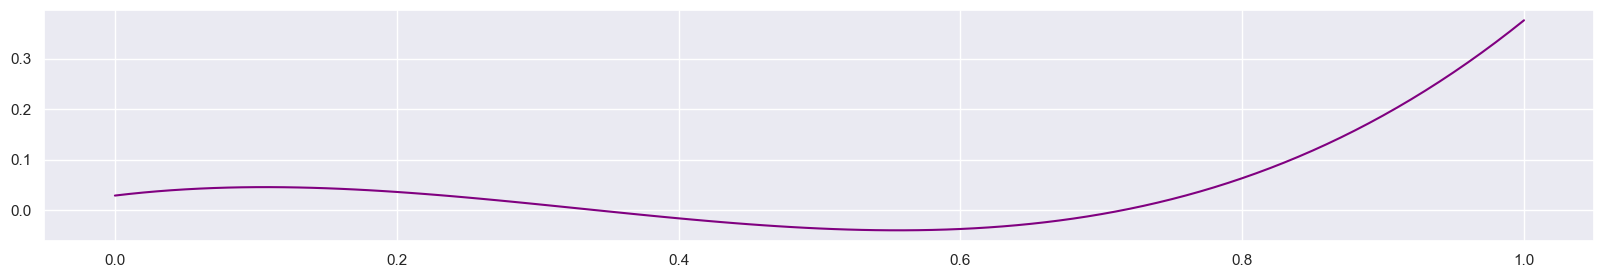

In [351]:
#use model to make predictions on response variable 
y_predicted = poly_reg_model.predict(poly_features) #create scatterplot of x vs. y plt.scatter(x, y) #add line to show fitted polynomial regression model
plt.plot(x, y_predicted, color='purple')

In [391]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df_3.nps_mean , y_predicted)

0.004087929488972828

In [393]:
y_predicted

array([ 2.85990424e-02,  3.17662379e-02,  3.45699052e-02,  3.70213604e-02,
        3.91319200e-02,  4.09129000e-02,  4.23756168e-02,  4.35313866e-02,
        4.43915256e-02,  4.49673501e-02,  4.52701763e-02,  4.53113205e-02,
        4.51020989e-02,  4.46538277e-02,  4.39778233e-02,  4.30854018e-02,
        4.19878795e-02,  4.06965727e-02,  3.92227975e-02,  3.75778703e-02,
        3.57731073e-02,  3.38198247e-02,  3.17293387e-02,  2.95129657e-02,
        2.71820218e-02,  2.47478233e-02,  2.22216865e-02,  1.96149276e-02,
        1.69388628e-02,  1.42048084e-02,  1.14240806e-02,  8.60799573e-03,
        5.76786996e-03,  2.91501956e-03,  6.07607664e-05, -2.78359017e-03,
       -5.60671700e-03, -8.39730348e-03, -1.11440334e-02, -1.38355904e-02,
       -1.64606584e-02, -1.90079210e-02, -2.14660621e-02, -2.38237653e-02,
       -2.60697145e-02, -2.81925934e-02, -3.01810857e-02, -3.20238752e-02,
       -3.37096457e-02, -3.52270808e-02, -3.65648645e-02, -3.77116803e-02,
       -3.86562122e-02, -

In [396]:
df_3.nps_mean.to_excel('qwe.xlsx')

In [395]:
x

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

<AxesSubplot:title={'center':'Распределение смс от МФО'}, xlabel='create_date'>

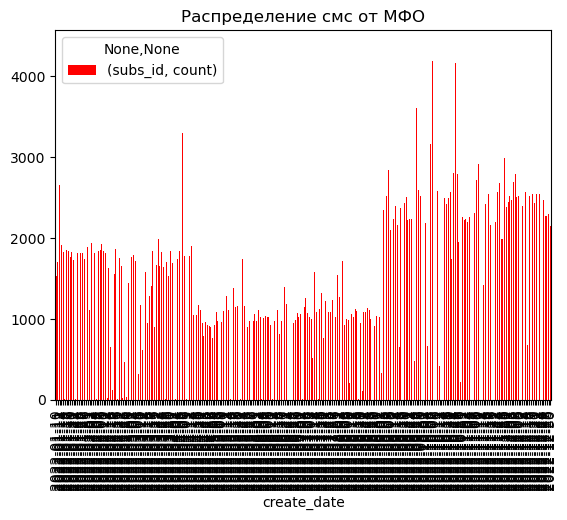

In [6]:
#Распределение по количеству
df.groupby(['create_date']).agg({'subs_id': ['count']}).reset_index().plot(kind='bar', x = 'create_date', title= 'Распределение смс от МФО', color = 'red')



In [ ]:
dfg=df1.groupby(['Month'])[['kolvo_sms', 'msisdn', 'kolvo_mfo']].agg(['mean'])
dfg

In [ ]:
g = sns.lmplot(
    data=dfg,
    x="kolvo_sms", y="kolvo_mfo",
    height=5
)

In [ ]:
df['create_date_n']=df['create_date'].apply(lambda x: x.replace(day=1))
df

In [301]:
df['create_date_1']=df['create_date_n'] - timedelta(1)

In [ ]:
df['create_date_1']=df['create_date_1'].apply(lambda x: x.replace(day=1))
df

In [ ]:
df.groupby(['create_date_n'])[['nps']].agg(['mean']).plot(kind='bar')


объединение данных


In [ ]:
# 1 без условий, по номеру
df_00 = pd.merge(df, df1, how='inner', on=['msisdn'])
df_00

In [ ]:
def f (row):
    if row ['kolvo_sms']>11 :
       val = 'yes' 
    else:
        val = 'no'
    return val
df_00['more then 11'] = df_00.apply (f, axis=1)
df_00['more then 11'].value_counts()

d_2345=df_00.groupby(['more then 11'])[['kolvo_mfo', 'kolvo_sms', 'nps']].agg([ 'mean', 'count'])
d_2345.columns = ['_'.join(col).strip() for col in d_2345.columns.values]
d_2345

In [ ]:
d00=df_00.groupby(['Month'])[['kolvo_sms', 'nps', 'kolvo_mfo']].agg(['mean'])
d00.corr()

In [ ]:
g0 = sns.lmplot(
    data=d00,
    x="nps", y="kolvo_sms",
    height=5
)
g1 = sns.lmplot(
    data=d00,
    x="nps", y="kolvo_mfo",
    height=5
)

Объеденение с уловиями месяц = месяц, месяц  = месяц - 1

In [ ]:
df_0 = pd.merge(df, df1, how='inner', left_on=['msisdn', 'create_date_n'] \
, right_on = ['msisdn','Month'])
df_0= df_0[['create_date', 'create_date_n', 'Month', 'msisdn', 'nps', 'kolvo_mfo', 'kolvo_sms', 'age', 'gender', 'ltr' ]]
df_0

In [ ]:
d0=df_0.groupby(['Month'])[['kolvo_sms', 'nps', 'kolvo_mfo']].agg(['mean'])
d0.corr()


In [ ]:
g0 = sns.lmplot(
    data=d0,
    x="nps", y="kolvo_mfo",
    height=5
)

In [ ]:
d02=df_0.groupby(['kolvo_sms'])[['kolvo_mfo', 'nps', ]].agg(['mean', 'sum'])
d02

In [ ]:
g04 = sns.lmplot(
    data=d02,
    x="nps", y="kolvo_sms",
    height=5
)

In [ ]:
df_0['bins']=pd.qcut(df_0['kolvo_sms'], q=4)
df_0

In [ ]:
df_0['bins'].value_counts()

In [ ]:
df11 = df_0[df_0['kolvo_sms'] >=11]
df11

In [ ]:
d_11=df11.groupby(['kolvo_mfo'])[['kolvo_sms']].agg(['mean', 'sum', 'count'])
d_11.columns = ['_'.join(col).strip() for col in d_11.columns.values]
d_11['kolvo_sms_mean'].plot(color ='tab:red', ylabel='kolvo_sms' , title='Зависимость смс от МФО')



In [ ]:
d_2=df_0.groupby(['bins'])[['kolvo_mfo', 'kolvo_sms', 'nps']].agg([ 'mean', 'sum'])
d_2.columns = ['_'.join(col).strip() for col in d_2.columns.values]
d_2[['kolvo_mfo_mean', 'kolvo_mfo_sum', 'kolvo_sms_mean', 'kolvo_sms_sum','nps_mean']]

In [ ]:
sns.heatmap(d_2[['kolvo_mfo_mean', 'kolvo_mfo_sum', 'kolvo_sms_mean', 'kolvo_sms_sum','nps_mean']].corr())

In [ ]:
df_0

In [510]:
df_0.drop('bins_2', axis= 1 , inplace= True ) 

In [ ]:
def f (row):
    if row ['kolvo_sms']>11 :
       val = 'yes' 
    else:
        val = 'no'
    return val
df_0['more then 11'] = df_0.apply (f, axis=1)
df_0['more then 11'].value_counts()


In [537]:
d_23=df_0.groupby(['more then 11'])[['kolvo_mfo', 'kolvo_sms', 'nps']].agg([ 'mean', 'count'])
d_23.columns = ['_'.join(col).strip() for col in d_23.columns.values]

In [ ]:
d_23

-month


In [ ]:
df_1 = pd.merge(df, df1, how='inner', left_on=['msisdn', 'create_date_1'] \
, right_on = ['msisdn','Month'])
df_1 = df_1[['create_date', 'create_date_1', 'Month', 'msisdn', 'nps', 'kolvo_mfo', 'kolvo_sms', 'age', 'gender', 'ltr' ]]
df_1

In [ ]:
df_1

In [ ]:
df12 = df_1[df_0['kolvo_sms'] >=11]
df12

In [541]:
def f (row):
    if row ['kolvo_sms']>11 :
       val = 'yes' 
    else:
        val = 'no'
    return val
df_1['more then 11'] = df_1.apply (f, axis=1)
df_1['more then 11'].value_counts()

no     1280
yes     458
Name: more then 11, dtype: int64

In [ ]:
d_234=df_1.groupby(['more then 11'])[['kolvo_mfo', 'kolvo_sms', 'nps']].agg([ 'mean', 'count'])
d_234.columns = ['_'.join(col).strip() for col in d_234.columns.values]
d_234

In [ ]:
d1=df_1.groupby(['Month'])[['kolvo_sms', 'kolvo_mfo', 'nps']].agg([ 'mean'])
print(d1.corr())
sns.heatmap(df_1[['kolvo_mfo','kolvo_sms','nps']].corr())

In [ ]:
g2 = sns.lmplot(
    data=d1,
    x="nps", y="kolvo_sms",
    height=5
)


In [ ]:
d2=df_1.groupby(['kolvo_sms'])[['kolvo_mfo', 'nps']].agg([ 'mean', 'count'])
d2.columns = ['_'.join(col).strip() for col in d2.columns.values]
d2
#df_1['bins'] = pd.cut(d2['kolvo_sms'],3)


In [ ]:
df_1['bins']=pd.qcut(df_1['kolvo_sms'], q=4)
df_1

In [ ]:
df_1['bins'].value_counts()

In [ ]:
d3=df_1.groupby(['bins'])[['kolvo_mfo', 'kolvo_sms', 'nps']].agg([ 'mean', 'sum'])
d3.columns = ['_'.join(col).strip() for col in d3.columns.values]
d3[['kolvo_mfo_mean', 'kolvo_mfo_sum', 'kolvo_sms_mean', 'kolvo_sms_sum','nps_mean']]


In [ ]:
d3[['kolvo_mfo_mean', 'kolvo_mfo_sum', 'kolvo_sms_mean', 'kolvo_sms_sum','nps_mean']].corr()

In [ ]:
sns.boxplot(x="ltr", y="kolvo_mfo",
          
            data=df_0)

In [ ]:
df_0

In [ ]:
sns.scatterplot(data = df_0, x='kolvo_mfo' , y = 'kolvo_sms', hue = 'gender')

In [ ]:
sns.displot(data=df_0, x="ltr")
sns.displot(data=df_0, x="age")
